This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 6ms/step - loss: 0.6098 - accuracy: 0.8148 - val_loss: 0.2730 - val_accuracy: 0.9156
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2489 - accuracy: 0.9213 - val_loss: 0.1749 - val_accuracy: 0.9493
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1616 - accuracy: 0.9503 - val_loss: 0.1491 - val_accuracy: 0.9557
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1141 - accuracy: 0.9641 - val_loss: 0.1558 - val_accuracy: 0.9507
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0835 - accuracy: 0.9731 - val_loss: 0.1439 - val_accuracy: 0.9589
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0626 - accuracy: 0.9798 - val_loss: 0.1240 - val_accuracy: 0.9657
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0451 - accuracy: 0.9860 - val_loss: 0.1387 - val_accuracy: 0.9638
Epoch 

**Plotting a validation accuracy comparison**

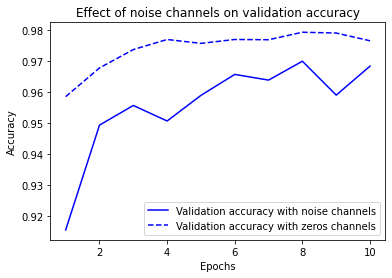

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3166 - accuracy: 0.1031 - val_loss: 2.3105 - val_accuracy: 0.1061
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2993 - accuracy: 0.1177 - val_loss: 2.3140 - val_accuracy: 0.1049
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2903 - accuracy: 0.1278 - val_loss: 2.3206 - val_accuracy: 0.1014
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2761 - accuracy: 0.1392 - val_loss: 2.3322 - val_accuracy: 0.1034
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2574 - accuracy: 0.1531 - val_loss: 2.3508 - val_accuracy: 0.1006
Epoch 6/100
375/375 [==============================] - 2s 7ms/step - loss: 2.2360 - accuracy: 0.1676 - val_loss: 2.3655 - val_accuracy: 0.1002
Epoch 7/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2104 - accuracy: 0.1833 - val_loss: 2.3726 - val_accuracy: 0.0980

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 1019.6594 - accuracy: 0.4232 - val_loss: 2.2699 - val_accuracy: 0.2481
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 3.5522 - accuracy: 0.2881 - val_loss: 3.5557 - val_accuracy: 0.3697
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 3.7754 - accuracy: 0.2878 - val_loss: 2.1309 - val_accuracy: 0.2444
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.7557 - accuracy: 0.2660 - val_loss: 2.1806 - val_accuracy: 0.2587
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.6439 - accuracy: 0.2586 - val_loss: 2.5043 - val_accuracy: 0.2502
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.7448 - accuracy: 0.2515 - val_loss: 2.1100 - val_accuracy: 0.2222
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5356 - accuracy: 0.2520 - val_loss: 4.0546 - val_accuracy: 0.2787
Epo

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4057 - accuracy: 0.9100 - val_loss: 0.2097 - val_accuracy: 0.9456
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1441 - accuracy: 0.9629 - val_loss: 0.1525 - val_accuracy: 0.9614
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1187 - accuracy: 0.9724 - val_loss: 0.1457 - val_accuracy: 0.9718
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0960 - accuracy: 0.9780 - val_loss: 0.1931 - val_accuracy: 0.9682
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0850 - accuracy: 0.9817 - val_loss: 0.2075 - val_accuracy: 0.9716
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0806 - accuracy: 0.9833 - val_loss: 0.2893 - val_accuracy: 0.9599
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0687 - accuracy: 0.9858 - val_loss: 0.2357 - val_accuracy: 0.9722
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6728 - accuracy: 0.8340 - val_loss: 0.3571 - val_accuracy: 0.9046
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3515 - accuracy: 0.9034 - val_loss: 0.3075 - val_accuracy: 0.9150
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3155 - accuracy: 0.9118 - val_loss: 0.2897 - val_accuracy: 0.9194
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2993 - accuracy: 0.9169 - val_loss: 0.2806 - val_accuracy: 0.9223
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2895 - accuracy: 0.9193 - val_loss: 0.2755 - val_accuracy: 0.9239
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2830 - accuracy: 0.9216 - val_loss: 0.2699 - val_accuracy: 0.9277
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2783 - accuracy: 0.9223 - val_loss: 0.2689 - val_accuracy: 0.9263
Epoch 

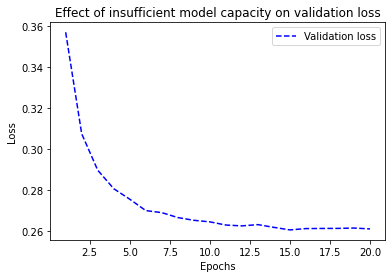

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3618 - accuracy: 0.8998 - val_loss: 0.1888 - val_accuracy: 0.9449
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1602 - accuracy: 0.9536 - val_loss: 0.1399 - val_accuracy: 0.9587
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1139 - accuracy: 0.9659 - val_loss: 0.1152 - val_accuracy: 0.9643
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0889 - accuracy: 0.9730 - val_loss: 0.1155 - val_accuracy: 0.9663
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0718 - accuracy: 0.9780 - val_loss: 0.0958 - val_accuracy: 0.9711
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0579 - accuracy: 0.9819 - val_loss: 0.0947 - val_accuracy: 0.9726
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0476 - accuracy: 0.9850 - val_loss: 0.0877 - val_accuracy: 0.9751
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 45ms/step - loss: 0.5497 - accuracy: 0.7751 - val_loss: 0.4246 - val_accuracy: 0.8583
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3382 - accuracy: 0.8973 - val_loss: 0.3292 - val_accuracy: 0.8778
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2389 - accuracy: 0.9265 - val_loss: 0.2913 - val_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1871 - accuracy: 0.9407 - val_loss: 0.2839 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1495 - accuracy: 0.9531 - val_loss: 0.2788 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1233 - accuracy: 0.9623 - val_loss: 0.2951 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1016 - accurac

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5552 - accuracy: 0.7779 - val_loss: 0.4584 - val_accuracy: 0.8450
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3837 - accuracy: 0.8922 - val_loss: 0.3661 - val_accuracy: 0.8808
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3006 - accuracy: 0.9141 - val_loss: 0.3235 - val_accuracy: 0.8840
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2487 - accuracy: 0.9272 - val_loss: 0.2957 - val_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2111 - accuracy: 0.9391 - val_loss: 0.2829 - val_accuracy: 0.8914
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1832 - accuracy: 0.9476 - val_loss: 0.2758 - val_accuracy: 0.8913
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1616 - accuracy: 0.9527 - val_loss: 0.2741 - val_accuracy: 0.8920
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5533 - accuracy: 0.7453 - val_loss: 0.3009 - val_accuracy: 0.8808
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2644 - accuracy: 0.8972 - val_loss: 0.3961 - val_accuracy: 0.8374
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1638 - accuracy: 0.9377 - val_loss: 0.2739 - val_accuracy: 0.8910
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0895 - accuracy: 0.9707 - val_loss: 0.3896 - val_accuracy: 0.8802
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1295 - accuracy: 0.9779 - val_loss: 0.3566 - val_accuracy: 0.8741
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0069 - accuracy: 0.9997 - val_loss: 0.4713 - val_accuracy: 0.8825
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 8.6927e-04 - accuracy: 1.0000 - val_loss: 0.6043 - val_accuracy: 0.8852
Epoch 8/2

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5913 - accuracy: 0.7837 - val_loss: 0.4740 - val_accuracy: 0.8447
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3935 - accuracy: 0.8939 - val_loss: 0.3801 - val_accuracy: 0.8879
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3223 - accuracy: 0.9169 - val_loss: 0.3628 - val_accuracy: 0.8859
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2903 - accuracy: 0.9250 - val_loss: 0.3693 - val_accuracy: 0.8782
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2713 - accuracy: 0.9327 - val_loss: 0.3538 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2598 - accuracy: 0.9367 - val_loss: 0.3573 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2506 - accuracy: 0.9402 - val_loss: 0.3697 - val_accuracy: 0.8816
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6353 - accuracy: 0.6287 - val_loss: 0.5232 - val_accuracy: 0.8548
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5308 - accuracy: 0.7381 - val_loss: 0.4320 - val_accuracy: 0.8736
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4631 - accuracy: 0.7921 - val_loss: 0.3682 - val_accuracy: 0.8699
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4037 - accuracy: 0.8289 - val_loss: 0.3282 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3528 - accuracy: 0.8669 - val_loss: 0.2933 - val_accuracy: 0.8939
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3103 - accuracy: 0.8859 - val_loss: 0.2802 - val_accuracy: 0.8919
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2764 - accuracy: 0.9031 - val_loss: 0.2718 - val_accuracy: 0.8948
Epoch 8/20
30

## Summary